<a href="https://colab.research.google.com/github/Affanamin/ComputerVision-Projects/blob/main/ComputerVision_Project02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Using Small Image Classification Using Convolutional Neural Network (CNN)

In [ ]:

import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
#Load the dataset

(X_train, y_train), (X_test,y_test) = datasets.cifar10.load_data()
X_train.shape

(50000, 32, 32, 3)

In [ ]:
X_test.shape

(10000, 32, 32, 3)

In [ ]:
y_train.shape

(50000, 1)

In [ ]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [ ]:
## y_train is a 2D array, for our classification having 1D array is good enough. so we will convert this to now 1D array

In [ ]:
y_train = y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [ ]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [ ]:
def plot_sample(X, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

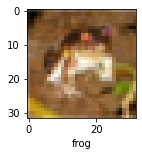

In [ ]:
plot_sample(X_train, y_train, 0)

In [ ]:
## Normalizing the training data

X_train = X_train / 255.0
X_test = X_test / 255.0

In [ ]:
## Build simple CNN for image classification

cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3),padding ='same' ,activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3) ,padding ='same' ,activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.BatchNormalization(),
    layers.Dropout(0.5),

    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [ ]:
cnn.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 8, 8, 64)          256       
_________________________________________________________________
dropout_1 (Dropout)          (None, 8, 8, 64)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 4096)             

In [ ]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
model_CNN = cnn.fit(X_train, y_train, epochs=10,validation_data=(X_test,y_test))

Epoch 1/10
1563/1563 [==============================] - 6s 4ms/step - loss: 1.6125 - accuracy: 0.4210 - val_loss: 1.4023 - val_accuracy: 0.5092
Epoch 2/10
1563/1563 [==============================] - 6s 4ms/step - loss: 1.1182 - accuracy: 0.6029 - val_loss: 1.0628 - val_accuracy: 0.6193
Epoch 3/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.9718 - accuracy: 0.6566 - val_loss: 0.9992 - val_accuracy: 0.6583
Epoch 4/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.8915 - accuracy: 0.6834 - val_loss: 0.9292 - val_accuracy: 0.6685
Epoch 5/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.8388 - accuracy: 0.7034 - val_loss: 0.9434 - val_accuracy: 0.6704
Epoch 6/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.7812 - accuracy: 0.7238 - val_loss: 1.0099 - val_accuracy: 0.6551
Epoch 7/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.7526 - accuracy: 0.7347 - val_loss: 0.8355 - val_accuracy:

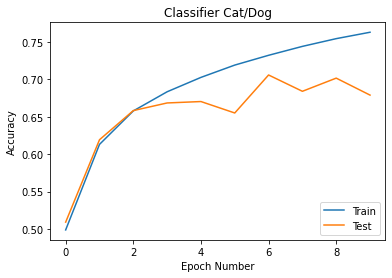

In [ ]:
plt.plot(model_CNN.history['accuracy'],label ='Train')
plt.plot(model_CNN.history['val_accuracy'],label ='Test')
plt.title('Classifier Cat/Dog')
plt.xlabel('Epoch Number')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

In [ ]:
cnn.evaluate(X_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.9490 - accuracy: 0.6790


[0.9490098357200623, 0.6790000200271606]

In [ ]:

y_pred = cnn.predict(X_test)
y_pred[:5]

array([[1.6405341e-03, 5.3198077e-05, 6.3575781e-04, 9.3781489e-01,
        9.1575540e-04, 5.4370929e-02, 3.4868363e-03, 9.1065711e-04,
        1.4448387e-04, 2.6940046e-05],
       [1.5142896e-03, 1.9395334e-01, 6.5232434e-06, 6.0548246e-06,
        2.5449785e-07, 3.3406789e-07, 1.2278877e-06, 3.5274226e-08,
        8.0415040e-01, 3.6751103e-04],
       [2.5225630e-01, 9.0102404e-02, 9.8366477e-02, 8.2537048e-02,
        4.0041614e-02, 8.7208794e-03, 9.9025451e-02, 9.7141348e-02,
        2.0745522e-01, 2.4353184e-02],
       [7.7179503e-01, 2.4211793e-03, 8.5658230e-02, 2.9125949e-03,
        3.7224046e-03, 2.1472225e-04, 3.5049203e-03, 2.1832318e-04,
        1.2820159e-01, 1.3508851e-03],
       [2.6187919e-07, 4.6297396e-06, 8.6505283e-03, 2.6002470e-02,
        5.6279697e-03, 9.2616079e-05, 9.5961326e-01, 2.0323671e-06,
        1.9653435e-06, 4.3031287e-06]], dtype=float32)

In [ ]:

y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[3, 8, 0, 0, 6]

In [ ]:
y_test[:5]

array([[3],
       [8],
       [8],
       [0],
       [6]], dtype=uint8)

TypeError: ignored

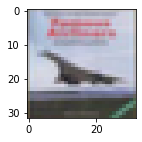

In [ ]:
plot_sample(X_test, y_test,3)

In [ ]:

classes[y_classes[3]]